In [18]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [9]:
def load_hdf5(path):
    """
    Load the HDF5 file and return the data.

    Parameters
    ----------
    path : str
        Path to the HDF5 file.

    Returns
    -------
    tuple
        A tuple containing the data arrays x and y.
    """
    with h5py.File(path, 'r') as f:
        x = f['x'][:]
        y = f['y'][:]
    return x, y

In [5]:
outdir = Path('/grid/koo/home/shared/clg_procap/mpra/250810')
tsvpath = outdir / 'K562_fold1_train_selected.tsv'

split = 'train'

In [6]:
df = pd.read_csv(tsvpath, sep='\t')
df.head()

,idx,start,end,sequence,header
0,18107,707,907,AACCGGGCCGACGCGCATGCGCGGGCTGCGGCCCCGCCCCAAAGGG...,train_18107_707_907
1,11238,857,1057,CCCGCGCCCTTTTCCACACTAAACTCTACCGCTGTTGTGAGCACAA...,train_11238_857_1057
2,15719,1007,1207,TAGCCCGGGCACACTCACCCGCGACCGCGGAAACGCAGCTGACAAT...,train_15719_1007_1207
3,19186,1207,1407,CGACCTCCGCTTCGGGTCCCGGCGGCCGGCAGTCACGACTCCTCCT...,train_19186_1207_1407
4,12328,957,1157,CTCCCTAGCCAATCCAGTACCTGCCAGAGGCGCCGGCACACAGCAC...,train_12328_957_1157


In [17]:
y_items = []
for i in range(10):
    header = df.loc[i, 'header']
    path = outdir / f'{header}.h5'
    x, y = load_hdf5(path)
    print(y[0])
    y_items.append(y)

-0.6153547
-0.51615536
-0.18114242
0.003296708
-0.3851641
0.10768454
-0.33999234
0.24444313
-0.2332085
0.23840165


In [22]:
# sort y_items by the first element
y_items = sorted(y_items, key=lambda x: x[0])

In [37]:
def plot_violins_with_wt(
    arrays,
    labels=None,
    inner="quartiles",
    figsize=(8, 4),
    title=None,
):
    n = len(arrays)
    labels = labels or [f"v{i+1}" for i in range(n)]
    line_kwargs = {"color": "red", "linewidth": 2}

    # long-form dataframe
    frames = []
    for lab, a in zip(labels, arrays):
        a = np.asarray(a, dtype=float)
        a = a[~np.isnan(a)]
        frames.append(pd.DataFrame({"group": lab, "value": a}))
    df = pd.concat(frames, ignore_index=True)

    fig, ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=df, x="group", y="value", order=labels, cut=0, inner=inner, ax=ax)

    # WT markers
    for i, a in enumerate(arrays):
        wt = float(np.asarray(a, dtype=float)[0])
        ax.hlines(wt, i - 0.35, i + 0.35, **line_kwargs)  # spans that violin only

    if title is not None:
        ax.set_title(title)

    ax.set_xlabel("")
    ax.set_ylabel("Predicted Activity")
    ax.tick_params(axis="x", rotation=45)
    ax.grid(True, linestyle='--', alpha=0.7)
    fig.tight_layout()
    return fig, ax

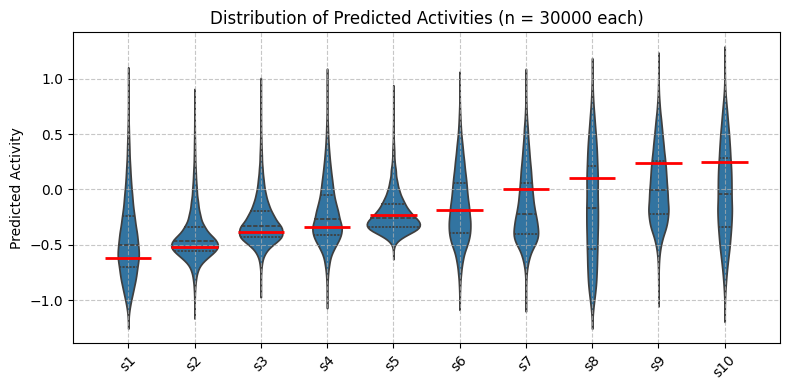

In [38]:
title = f"Distribution of Predicted Activities (n = {len(y_items[0])} each)"
xlabels = [f's{i+1}' for i in range(len(y_items))]
fig, ax = plot_violins_with_wt(y_items, title=title, labels=xlabels)
plt.savefig(outdir / f'predicted_activity_violins.png', dpi=600)
plt.show()